# LSTD

In [1]:
%matplotlib notebook
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import tabulate
import numpy as np

In [2]:
import gym
from envs import MDP
from policies import Policy, UniformPolicy, RandomPolicy

In [3]:
env = gym.make('ThreeState-v0')
policy = RandomPolicy(env.n_nstates, env.action_space.n)

In [4]:
assert env.n_states == 5 and env.n_nstates == 3
a, b = 1, 1
features = np.array([[1, 0], [0, 1], [a, b]], dtype=np.float)

In [5]:
from algorithms.closed_form import cf_policy_eval
from algorithms.error_functions import mean_squared_value_error
from algorithms.error_functions import bellman_error
from algorithms.error_functions import td_error

v_pi = cf_policy_eval(env, policy)
msve = mean_squared_value_error(env, policy)
be = bellman_error(env, policy)
tde = td_error(env, policy)

In [6]:
from algorithms.closed_form import cf_minimum_msve
from algorithms.closed_form import cf_minimum_tderror
from algorithms.closed_form import cf_minimum_bellman

table = [["Values", "MSV Error", "Bellman Error", "TD Error"]]
error_fns = [msve, be, tde]
table.append(["v_pi"] + [np.round(x, decimals=7) for x in [err(v_pi) for err in error_fns]])

w_msve = cf_minimum_msve(env, policy, features)
v_msve = features @ w_msve
table.append(["min MSVE(w)"] + [np.round(x, decimals=7) for x in [err(v_msve) for err in error_fns]])

w_be = cf_minimum_bellman(env, policy, features)
v_be = features @ w_be
table.append(["min Bellman(w)"] + [np.round(x, decimals=7) for x in [err(v_be) for err in error_fns]])

w_td = cf_minimum_tderror(env, policy, features)
v_td = features @ w_td
table.append(["min TDerr(w)"] + [np.round(x, decimals=7) for x in [err(v_td) for err in error_fns]])

print(tabulate.tabulate(table, headers="firstrow"))

Values            MSV Error    Bellman Error    TD Error
--------------  -----------  ---------------  ----------
v_pi               0                0            1.58285
min MSVE(w)        0.273474         0.336611     1.81658
min Bellman(w)     0.43657          0.260458     1.85494
min TDerr(w)       0.31782          0.305187     1.72926


<IPython.core.display.Javascript object>


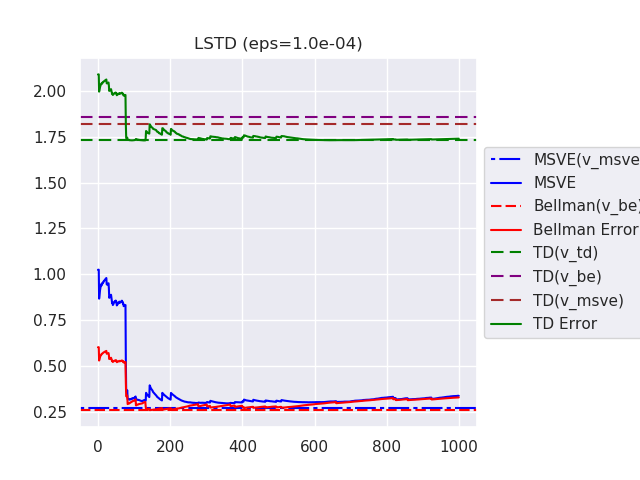

In [7]:
from algorithms.online_algorithms import LSTD
EPS = .0001

lstd = LSTD(env, policy, features, eps=EPS)
results = lstd.train(episodes_no=1000, step=1)
x = np.arange(len(results["msve"]))

plt.figure()
ax = plt.subplot(111)
plt.title(f"LSTD (eps={EPS:.1e})")
ax.axhline(msve(v_msve), color="blue", dashes=[2, 2, 10, 2], label="MSVE(v_msve)")
ax.plot(x, results["msve"], color="blue", label="MSVE")
ax.axhline(be(v_be), color="red", dashes=[5, 2], label="Bellman(v_be)")
ax.plot(x, results["berr"], color="red", label="Bellman Error")
ax.axhline(tde(v_td), color="green", dashes=[6, 3], label="TD(v_td)")
ax.axhline(tde(v_be), color="purple", dashes=[6, 3], label="TD(v_be)")
ax.axhline(tde(v_msve), color="brown", dashes=[6, 3], label="TD(v_msve)")

ax.plot(x, results["tderr"], color="green", label="TD Error")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])